###### Problem Statement

- A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
- Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

- Dataset:- Company_Data.csv

In [2]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


###### EDA

In [3]:
data.shape

(400, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data.describe(include='O')

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


In [7]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


- Visualisation

In [9]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

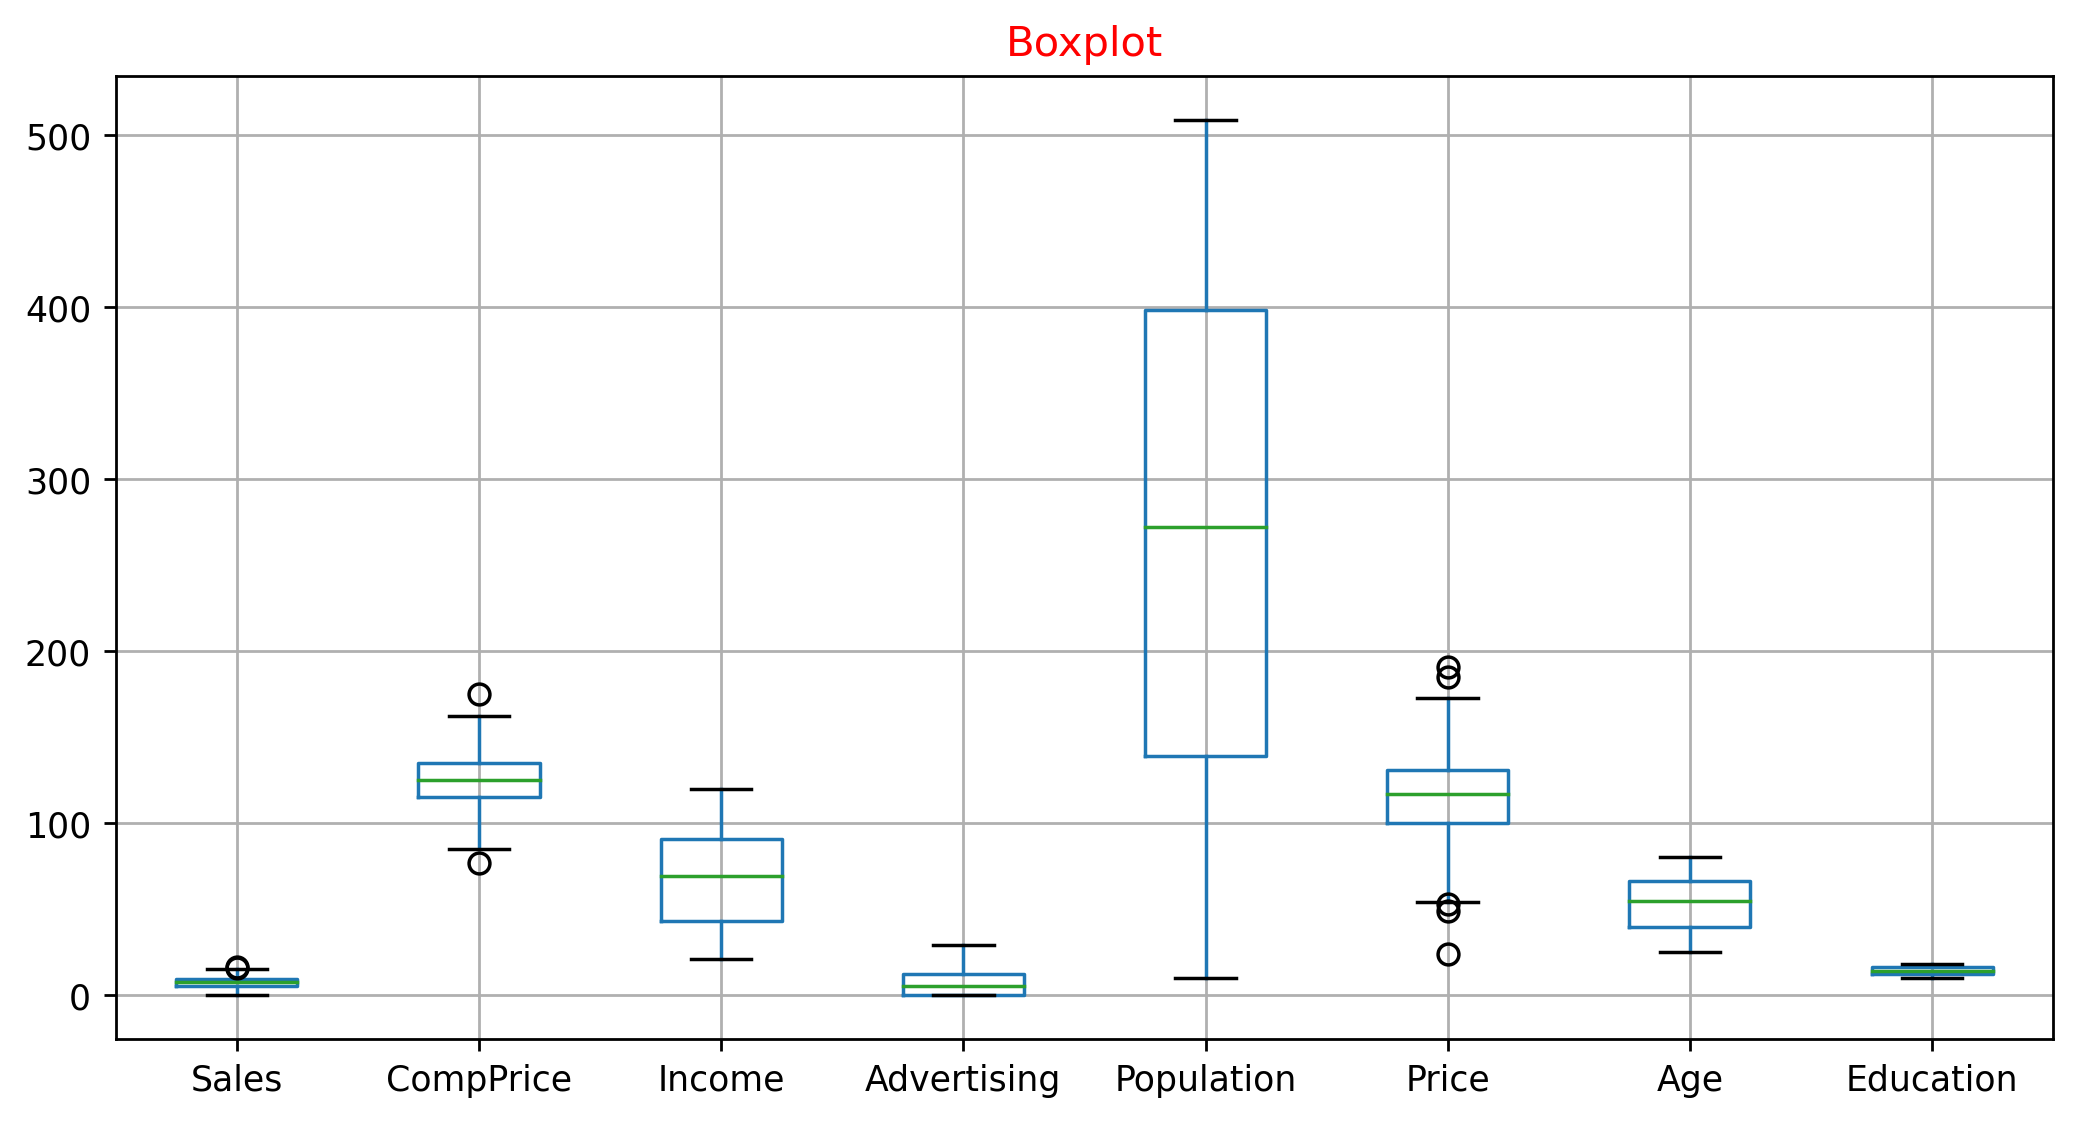

In [10]:
data.boxplot();
plt.title('Boxplot', c='r');

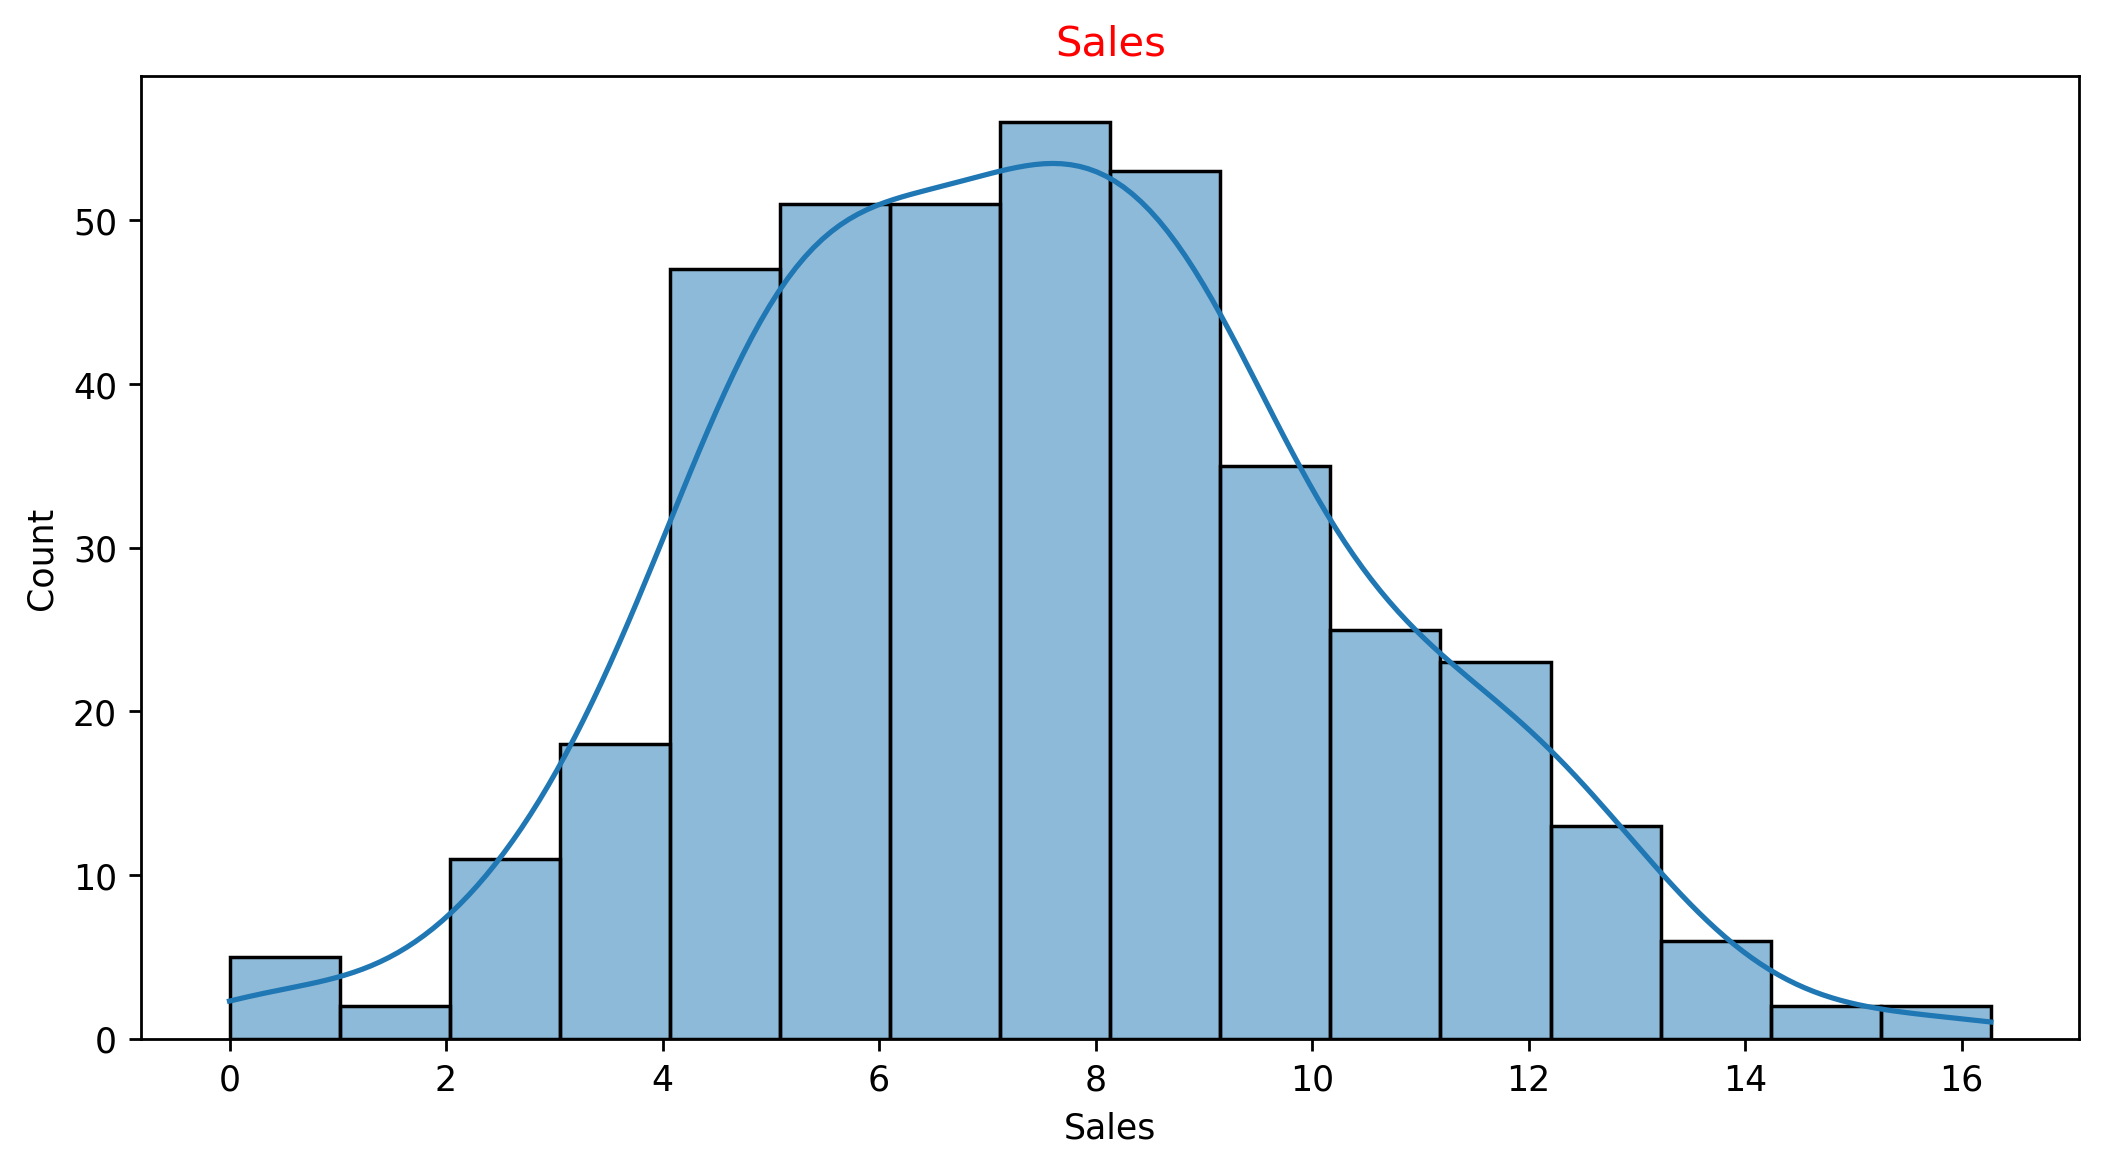

In [11]:
sns.histplot(data['Sales'], kde=True);
plt.title('Sales', c='r');

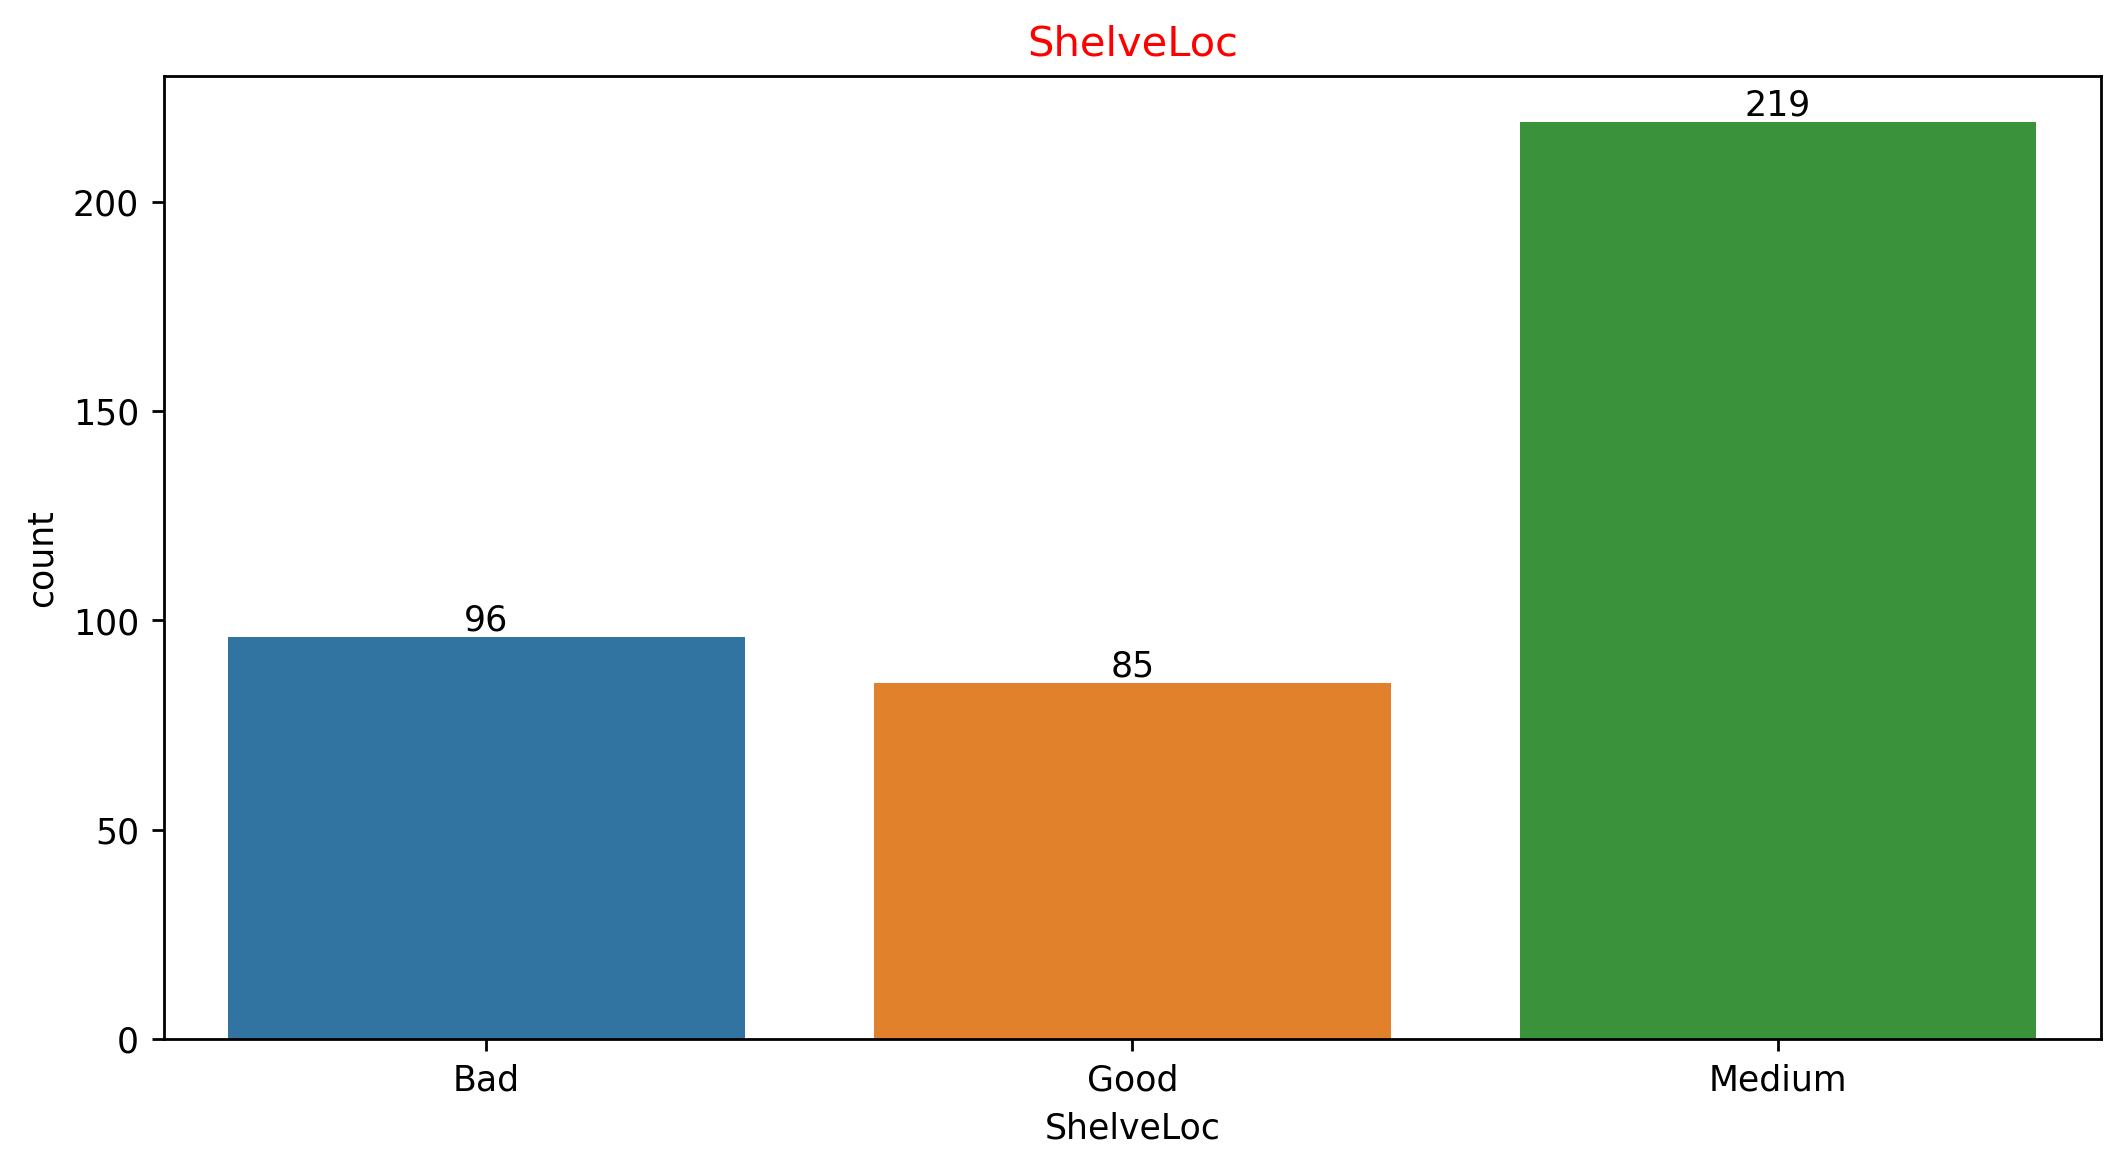

In [12]:
ax = sns.countplot('ShelveLoc', data=data)
ax.bar_label(ax.containers[0]);
plt.title('ShelveLoc', c='r');

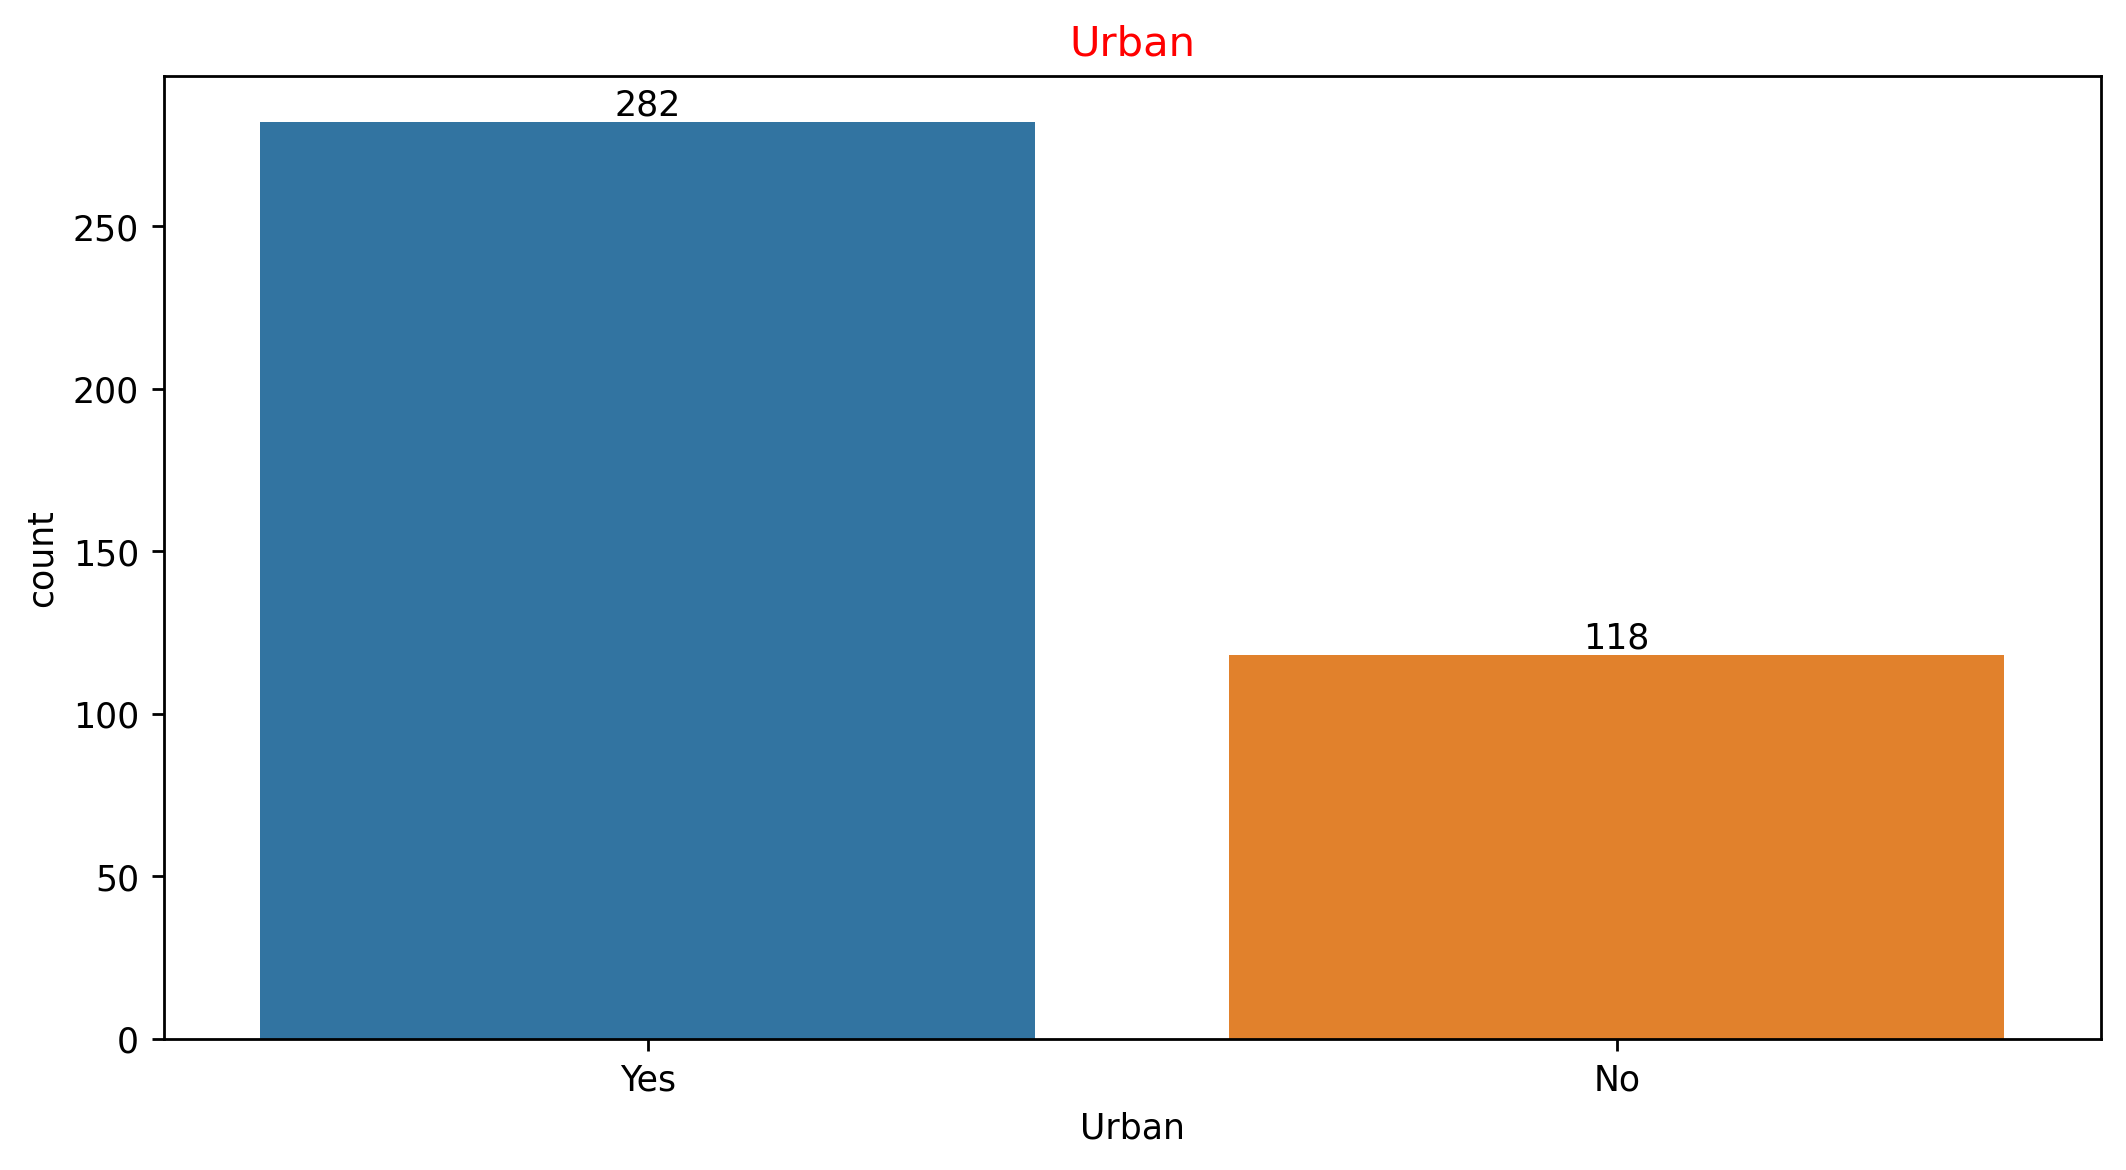

In [13]:
ax = sns.countplot('Urban', data=data)
ax.bar_label(ax.containers[0]);
plt.title('Urban', c='r');

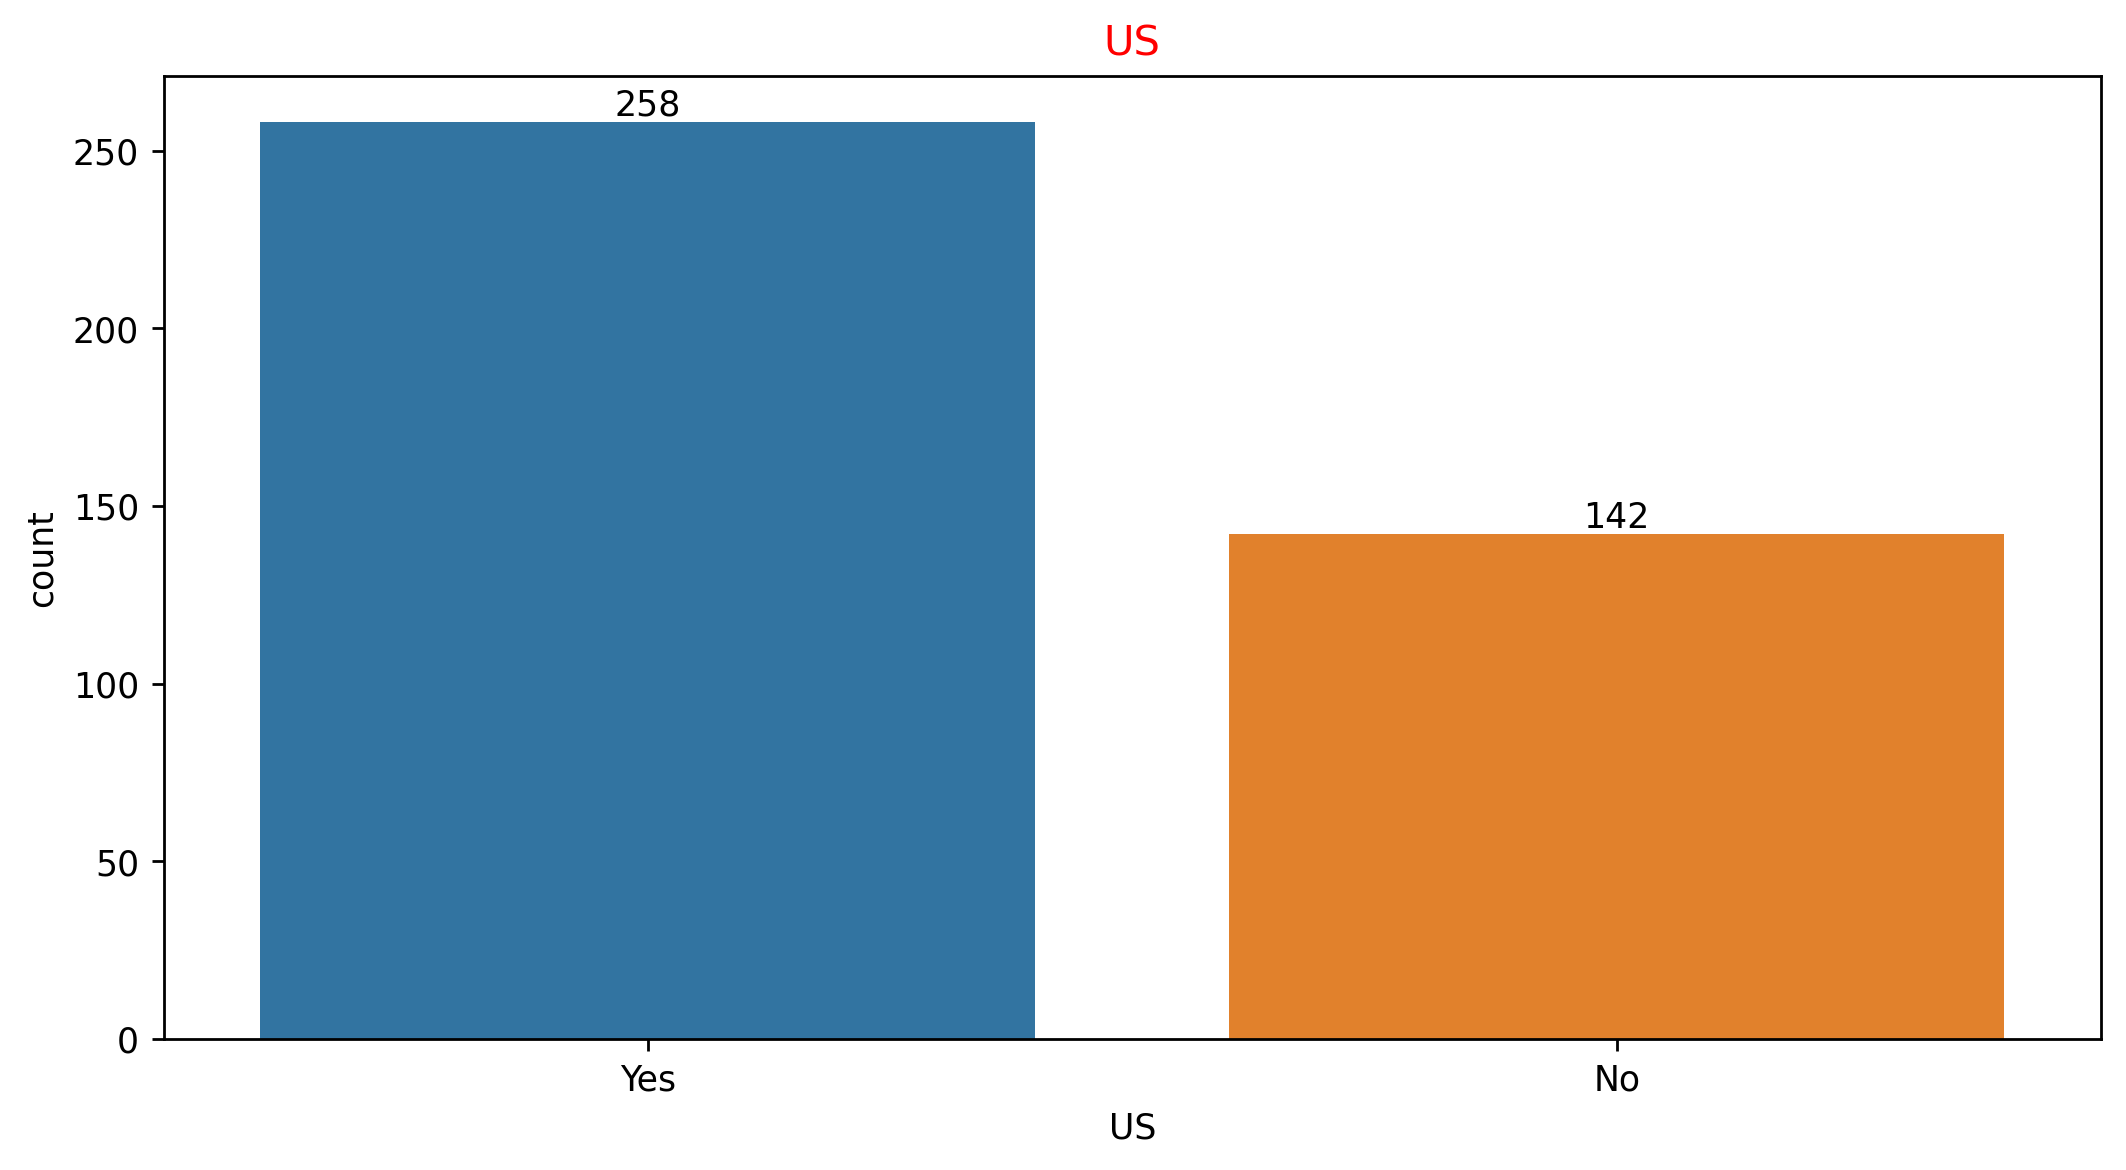

In [14]:
ax = sns.countplot('US', data=data)
ax.bar_label(ax.containers[0]);
plt.title('US', c='r');

In [15]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


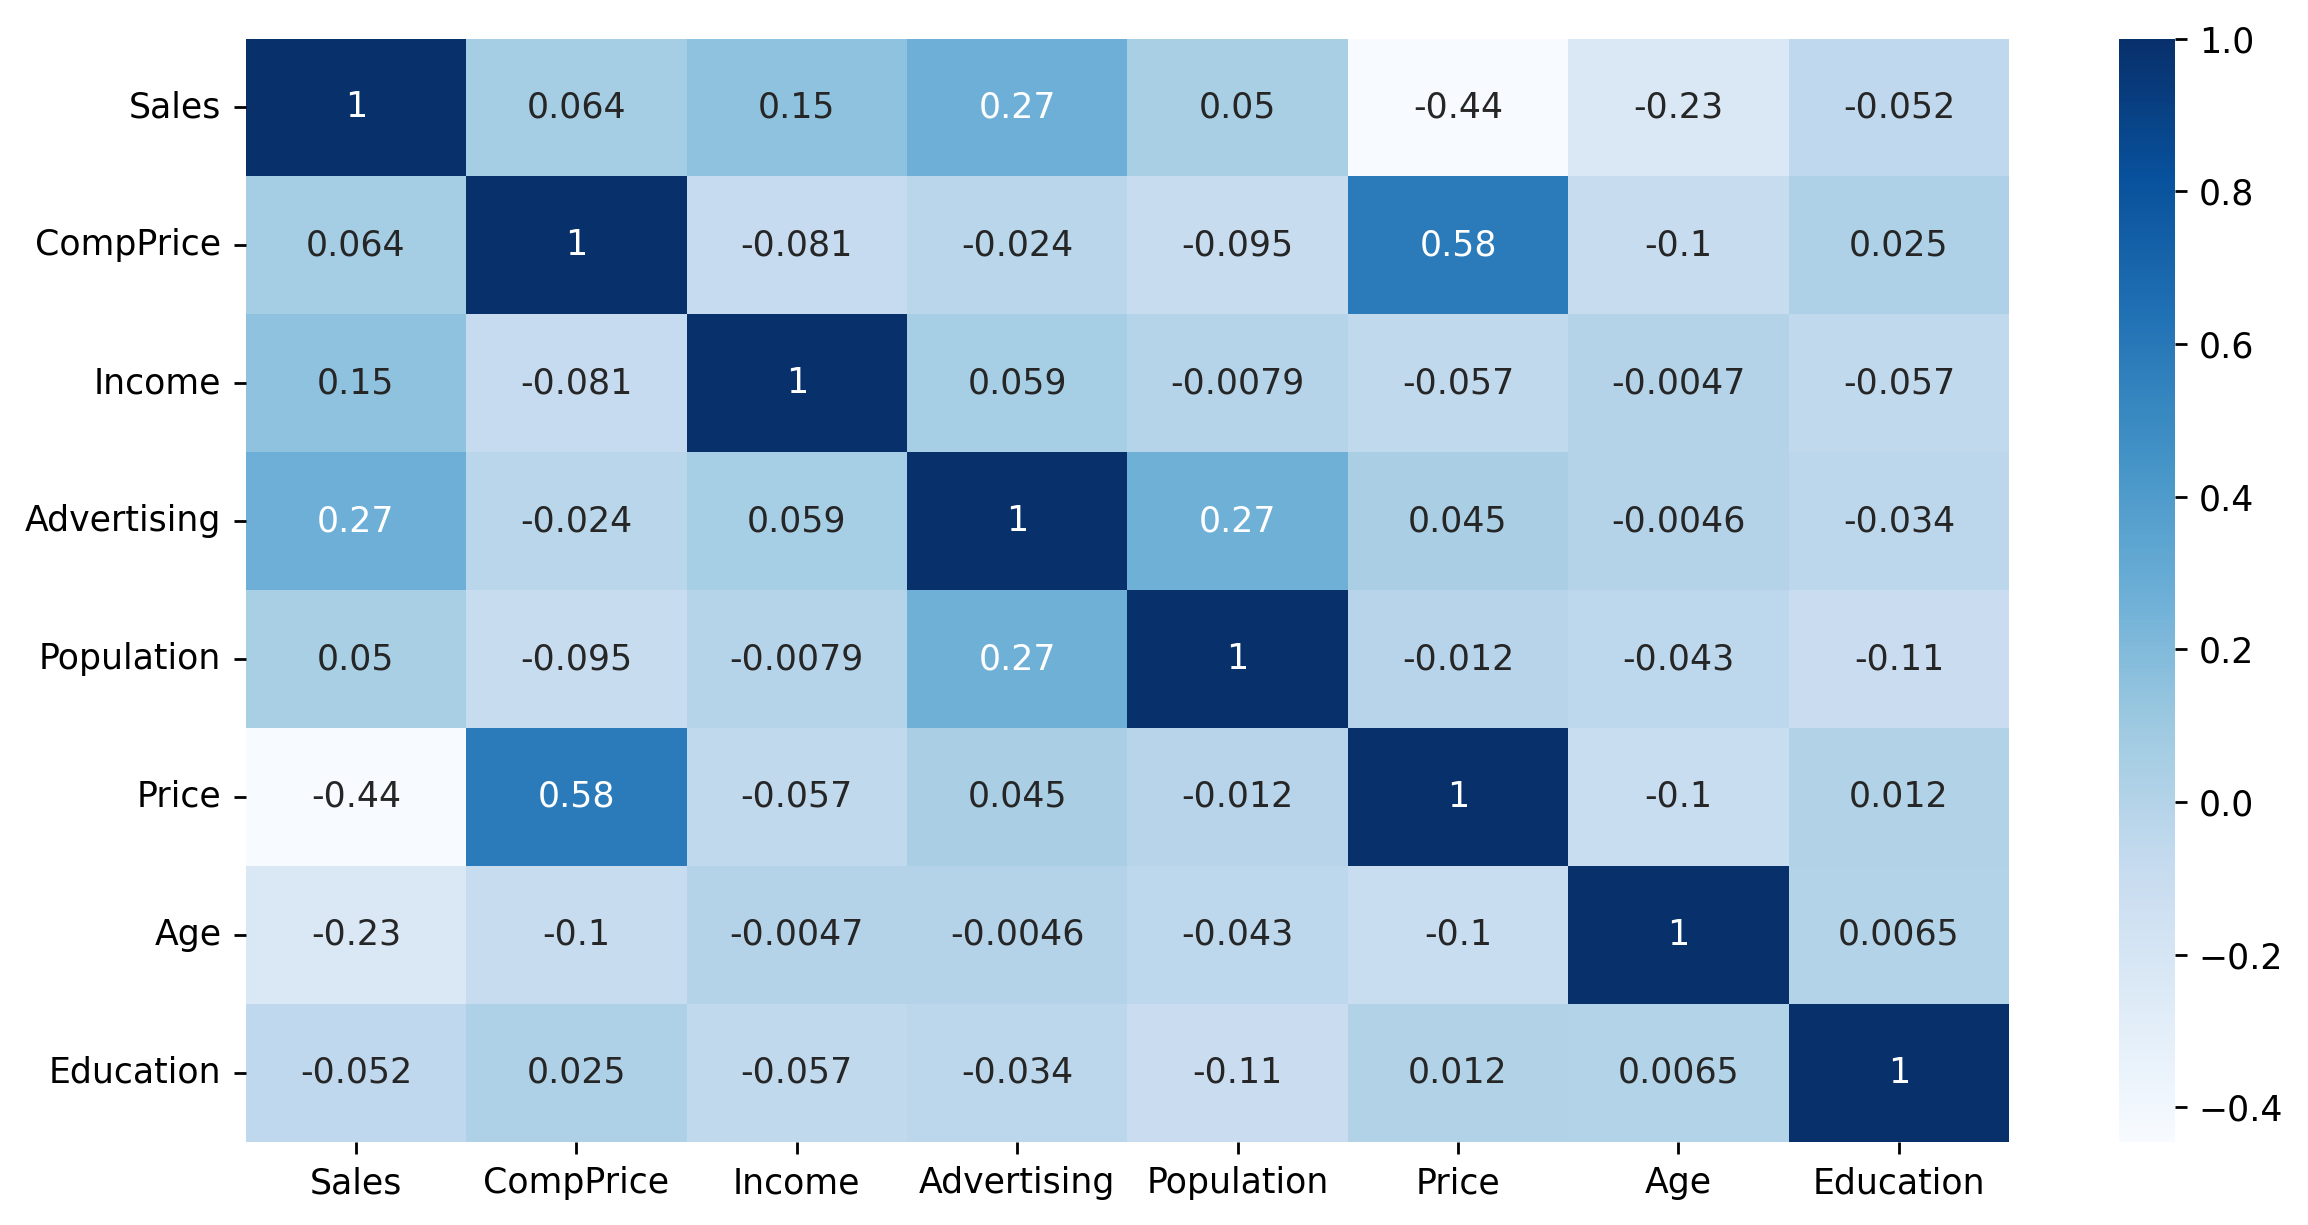

In [16]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.tight_layout()

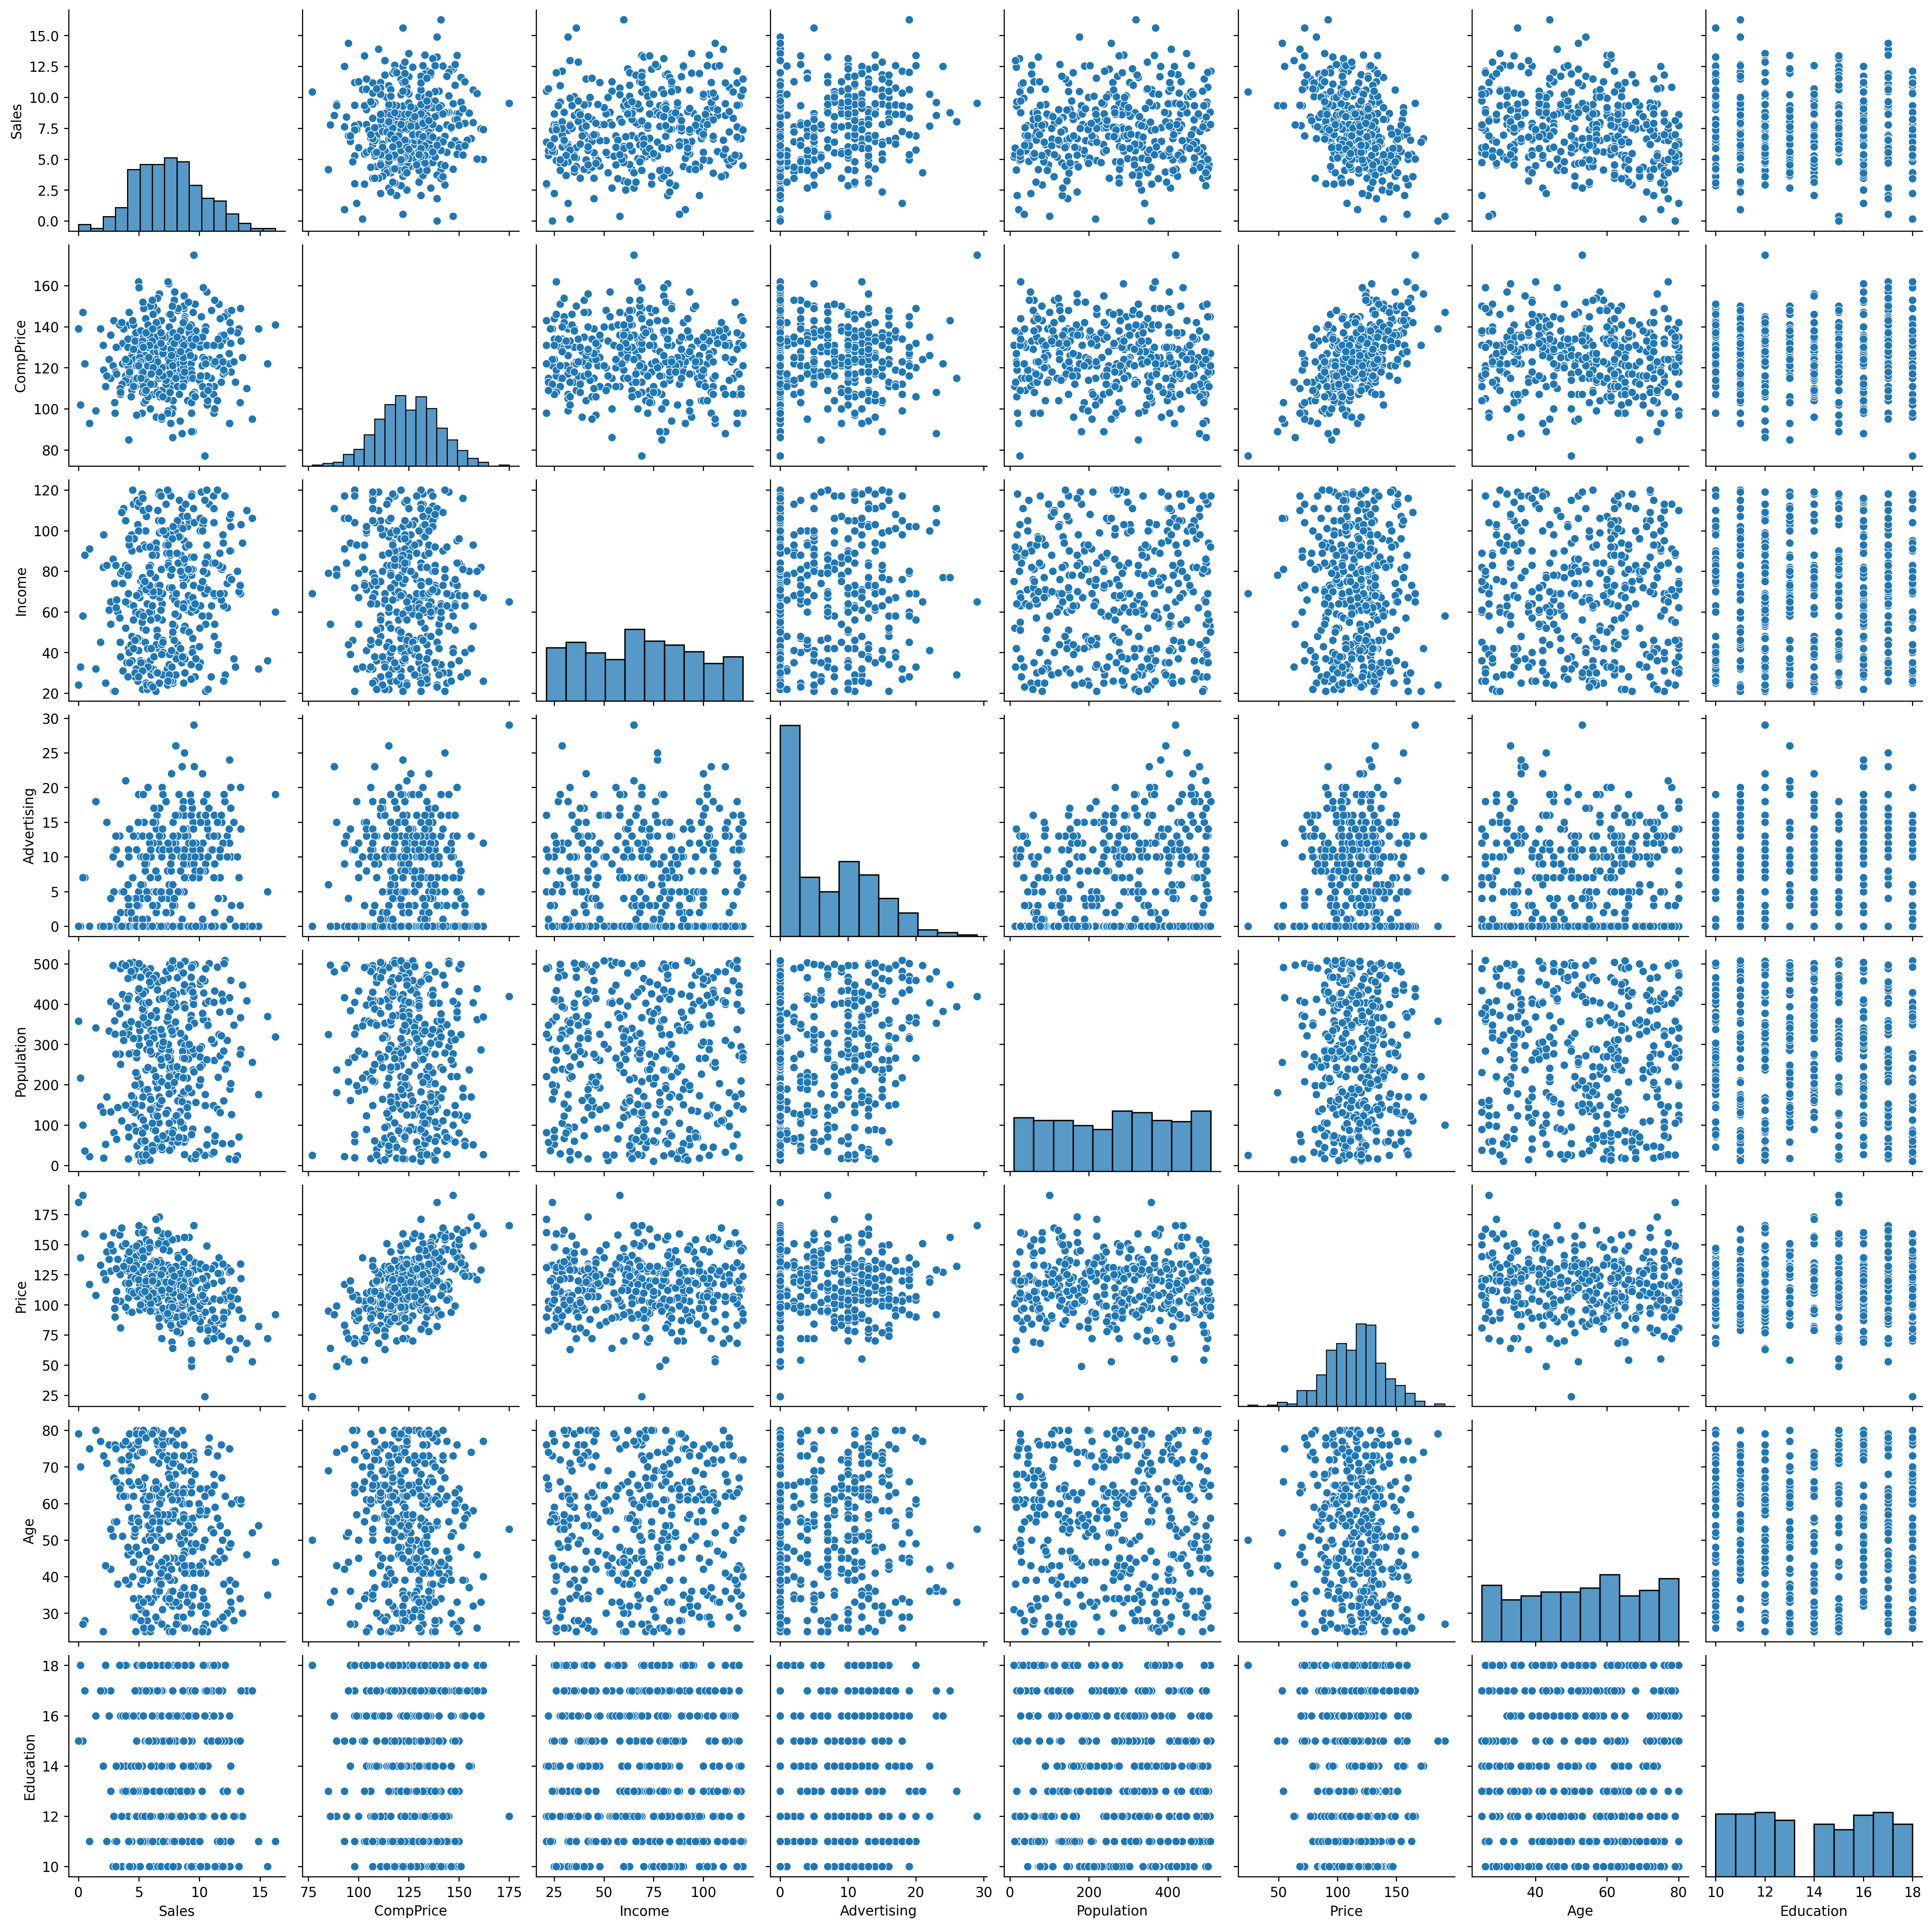

In [17]:
sns.pairplot(data)

In [18]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


- As per the problem statement says, target variable is sales and we need to convert it first into categorical variable.
- so here in sales column maximum sale value is 16.27k.
- so to covert it into categorical we need to assign classes to a particular range of sales.
- If we devide it into 3 classes (16.27/3 = 5.42) then we can differentiate it as:  
- sales < 5.5 = Low  
- 5.5 < sales < 11 = Medium  
- sales > 11 = High

In [19]:
Class = []

for i in data['Sales']:
    if i < 5.5:
        Class.append('Low')
    elif 5.5 < i < 11:
        Class.append('Medium')
    else:
        Class.append('High')

In [20]:
Class

['Medium',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Low',
 'Medium',
 'High',
 'Low',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'Low',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Low',
 'High',
 'Medium',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'Medium',
 'High',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Low',
 'Low',
 'Medium',
 'Low

In [21]:
#Drop Sales variable.
data.drop(columns='Sales', axis=1, inplace=True)
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [22]:
#Add new Class variable.
data['Class'] = Class
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Class
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Medium


In [23]:
#Ordinal encoding for independent variables.

oe = OrdinalEncoder()

data[['ShelveLoc','Urban','US']] = oe.fit_transform(data[['ShelveLoc','Urban','US']])

data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Class
0,138,73,11,276,120,0.0,42,17,1.0,1.0,Medium
1,111,48,16,260,83,1.0,65,10,1.0,1.0,High
2,113,35,10,269,80,2.0,59,12,1.0,1.0,Medium
3,117,100,4,466,97,2.0,55,14,1.0,1.0,Medium
4,141,64,3,340,128,0.0,38,13,1.0,0.0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,33,14,1.0,1.0,High
396,139,23,3,37,120,2.0,55,11,0.0,1.0,Medium
397,162,26,12,368,159,2.0,40,18,1.0,1.0,Medium
398,100,79,7,284,95,0.0,50,12,1.0,1.0,Medium


###### Model Building

###### 1) Using - Train Test Split

In [24]:
x = data.iloc[:,0:-1]
y = data['Class']

In [25]:
#Label encoding for target variable.

le = LabelEncoder()

y = le.fit_transform(y)
y

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2,

In [26]:
data['Class'] = y
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Class
0,138,73,11,276,120,0.0,42,17,1.0,1.0,2
1,111,48,16,260,83,1.0,65,10,1.0,1.0,0
2,113,35,10,269,80,2.0,59,12,1.0,1.0,2
3,117,100,4,466,97,2.0,55,14,1.0,1.0,2
4,141,64,3,340,128,0.0,38,13,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,33,14,1.0,1.0,0
396,139,23,3,37,120,2.0,55,11,0.0,1.0,2
397,162,26,12,368,159,2.0,40,18,1.0,1.0,2
398,100,79,7,284,95,0.0,50,12,1.0,1.0,2


In [27]:
#Splitting data.
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [28]:
#Random forest model using Decision tree CART - gini impurities.
model = RandomForestClassifier(criterion='gini')

model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest,ypred))

print('Training Accuracy = ', model.score(xtrain,ytrain))
print('Testing Accuracy = ', model.score(xtest,ytest))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.60      0.43      0.50        21
           2       0.69      0.88      0.77        50

    accuracy                           0.68        80
   macro avg       0.76      0.47      0.49        80
weighted avg       0.70      0.68      0.64        80

Training Accuracy =  1.0
Testing Accuracy =  0.675


In [29]:
#Random forest model using Decision tree C5.0
model1 = RandomForestClassifier(criterion='entropy')

model1.fit(xtrain,ytrain)
ypred1 = model.predict(xtest)

print(classification_report(ytest,ypred1))

print('Training Accuracy = ', model1.score(xtrain,ytrain))
print('Testing Accuracy = ', model1.score(xtest,ytest))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.60      0.43      0.50        21
           2       0.69      0.88      0.77        50

    accuracy                           0.68        80
   macro avg       0.76      0.47      0.49        80
weighted avg       0.70      0.68      0.64        80

Training Accuracy =  1.0
Testing Accuracy =  0.7


###### 2) Using = K-Fold Cross Validation

In [30]:
#Random forest model using Decision tree CART - gini impurities
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

model4 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3)
results = cross_val_score(model4, x, y, cv=kfold)

results.mean()

0.6674999999999999

In [31]:
#Random forest model using Decision tree C5.0
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

model4 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3)
results = cross_val_score(model4, x, y, cv=kfold)

results.mean()

0.6674999999999999

###### Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
model2 = RandomForestClassifier()

params = {
    'n_estimators' : [100,150,200,250,300],
    'criterion' : ['gini','entropy'],
    'max_depth' : [1,2,3,4,5,6]  
}

In [34]:
grid = GridSearchCV(RandomForestClassifier(), params)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [35]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 150}

In [36]:
model3 = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=6)

model3.fit(xtrain,ytrain)
ypred2 = model3.predict(xtest)

print(classification_report(ytest,ypred2))

print('Training Accuracy = ', model3.score(xtrain,ytrain))
print('Testing Accuracy = ', model3.score(xtest,ytest))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      0.29      0.37        21
           2       0.65      0.90      0.76        50

    accuracy                           0.64        80
   macro avg       0.40      0.40      0.38        80
weighted avg       0.55      0.64      0.57        80

Training Accuracy =  0.896875
Testing Accuracy =  0.6375


In [37]:
model3 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3)

model3.fit(xtrain,ytrain)
ypred2 = model3.predict(xtest)

print(classification_report(ytest,ypred2))

print('Training Accuracy = ', model3.score(xtrain,ytrain))
print('Testing Accuracy = ', model3.score(xtest,ytest))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      0.29      0.37        21
           2       0.65      0.90      0.76        50

    accuracy                           0.64        80
   macro avg       0.40      0.40      0.38        80
weighted avg       0.55      0.64      0.57        80

Training Accuracy =  0.75
Testing Accuracy =  0.6375


In [38]:
model3 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, max_features=2)

model3.fit(xtrain,ytrain)
ypred2 = model3.predict(xtest)

print(classification_report(ytest,ypred2))

print('Training Accuracy = ', model3.score(xtrain,ytrain))
print('Testing Accuracy = ', model3.score(xtest,ytest))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.67      0.19      0.30        21
           2       0.65      0.96      0.77        50

    accuracy                           0.65        80
   macro avg       0.44      0.38      0.36        80
weighted avg       0.58      0.65      0.56        80

Training Accuracy =  0.715625
Testing Accuracy =  0.65


## =======================================================================